In [102]:
import openseespy.opensees as ops
import numpy as np
import matplotlib.pyplot as plt
import opsvis as opsv

In [103]:
ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

In [104]:
base = [0,6,12,18,24]
stories = [i*3.65 for i in range(9)]
points = [[x,y] for y in stories for x in base ]

for i,point in enumerate(points):
    ops.node(i+1,point[0],point[1])

ops.fixY(0.0,1,1,1) #restringe todos los nodos en y = 0.0

In [105]:
ops.geomTransf('Linear',1)
columns = [[i+1+5*j,i+6+5*j] for j in range(8) for i in range(5)]
beams = [[i+6+5*j,i+7+5*j] for j in range(8) for i in range(4)]

#Propiedades de columnas
Area = 0.80*0.80
E_mod = 4700*(28)**0.5*1000
Iz = 0.80*0.80**3/12
for col in columns:
    tag = len(ops.getEleTags())
    ops.element('elasticBeamColumn',tag+1,*col,Area,E_mod,Iz,1)

#Propiedades de Vigas
Area = 0.55*0.80
E_mod = 4700*(28)**0.5*1000
Iz = 0.55*0.80**3/12
for col in beams:
    tag = len(ops.getEleTags())
    ops.element('elasticBeamColumn',tag+1,*col,Area,E_mod,Iz,1)

<AxesSubplot:>

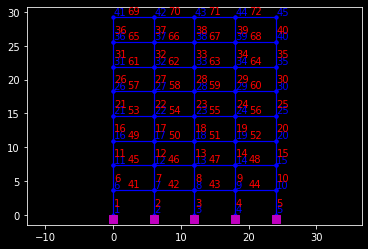

In [106]:
opsv.plot_model()

In [107]:
#Cargas
ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)

#Cargas en columnas (tag 1-40)
eleTags = range(1,41)
Wy = 0
Wx = -18.432
ops.eleLoad('-ele', *eleTags,'-type', '-beamUniform', Wy, Wx)

#Cargas en columnas (tag 41-72)
eleTags = range(41,73)
Wy = -38.132
Wx = 0
ops.eleLoad('-ele', *eleTags,'-type', '-beamUniform', Wy, Wx)

In [108]:
#opsv.plot_loads_2d()
#ops.getEleLoadData()

In [109]:
#asignar masa
m1 = 86.41071188774965
m2 = 72.44063976995203
mass_tags = range(6,46)
for mass_tag in mass_tags:
    if mass_tag < 41:
        ops.mass(mass_tag,m1,0.0,0.0)
    else:
        ops.mass(mass_tag,m2,0.0,0.0)

In [110]:
#Analisis modal
n_modos = 8
OmegaSq = np.array(ops.eigen('-fullGenLapack',n_modos))
Omega = OmegaSq ** 0.5
T = 2*np.pi/Omega

print(T)

[1.29928223 0.41763104 0.23461651 0.15682471 0.11438968 0.08923563
 0.07425298 0.06962628]


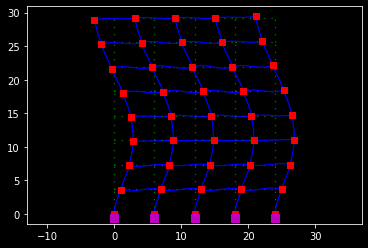

In [112]:
opsv.plot_mode_shape(2)